# Ch06. 타이타닉 원시(raw) 데이터 요약하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 01. 피벗테이블을 만드는 이유
* pivot_table의 4개의 주요 인자
    * values
        * 집계의 대상이 되는 열
    * index
        * 피벗 테이블의 index로 구분될 특성(열)
    * columns
        * 피벗 테이블의 columns로 구분될 특성(열)
    * aggfunc
        * 집계함수
* pivot함수
    * 집계함수 없이 피벗 테이블을 만드는 함수
    * 문자열 피벗팅도 가능

## 02. 피벗테이블 만들기(pivot_table)

In [2]:
data = [
    ['김판다', '남', 'A', 97, '1등', '수시'],
    ['강승주', '여', 'A', 88, '2등', '정시'],
    ['권보아', '여', 'A', 78, '3등', '정시'],
    ['이예준', '여', 'B', 64, '3등', '수시'],
    ['박효신', '남', 'B', 84, '2등', '수시'],
    ['송중기', '남', 'B', 89, '1등', '수시'],
    ['김나현', '여', 'C', 87, '3등', '정시'],
    ['장범준', '남', 'C', 92, '2등', '정시'],
    ['안지영', '여', 'C', 99, '1등', '수시']
]
col1 = ['이름', '성별', '반', '점수', '반등수', '비고']
df = pd.DataFrame(data=data, columns=col1)
df

,이름,성별,반,점수,반등수,비고
0,김판다,남,A,97,1등,수시
1,강승주,여,A,88,2등,정시
2,권보아,여,A,78,3등,정시
3,이예준,여,B,64,3등,수시
4,박효신,남,B,84,2등,수시
5,송중기,남,B,89,1등,수시
6,김나현,여,C,87,3등,정시
7,장범준,남,C,92,2등,정시
8,안지영,여,C,99,1등,수시


In [3]:
df.pivot_table(values='점수', index='반', columns='성별', aggfunc='mean')

성별,남,여
반,,
A,97.0,83.0
B,86.5,64.0
C,92.0,93.0


In [4]:
df.pivot_table(values='점수', index=['반', '성별'], columns='비고', aggfunc='mean')

비고      수시    정시
반 성별            
A 남   97.0   NaN
  여    NaN  83.0
B 남   86.5   NaN
  여   64.0   NaN
C 남    NaN  92.0
  여   99.0  87.0

In [5]:
df.pivot_table(values='점수', index='반', columns=['성별','비고'], aggfunc='mean')

성별     남           여      
비고    수시    정시    수시    정시
반                         
A   97.0   NaN   NaN  83.0
B   86.5   NaN  64.0   NaN
C    NaN  92.0  99.0  87.0

In [6]:
df.pivot_table(values='점수', index='반', columns=['성별','비고'], aggfunc='count')

성별    남         여     
비고   수시   정시   수시   정시
반                     
A   1.0  NaN  NaN  2.0
B   2.0  NaN  1.0  NaN
C   NaN  1.0  1.0  1.0

In [7]:
df.pivot_table(values='점수', index='반', columns=['성별','비고'], aggfunc=['mean','count'])

mean                   count               
성별     남           여           남         여     
비고    수시    정시    수시    정시    수시   정시   수시   정시
반                                              
A   97.0   NaN   NaN  83.0   1.0  NaN  NaN  2.0
B   86.5   NaN  64.0   NaN   2.0  NaN  1.0  NaN
C    NaN  92.0  99.0  87.0   NaN  1.0  1.0  1.0

In [9]:
df.pivot(index='반', columns='반등수', values='이름')

반등수,1등,2등,3등
반,,,
A,김판다,강승주,권보아
B,송중기,박효신,이예준
C,안지영,장범준,김나현


## 03. 결측값 삭제하기(dropna)

In [10]:
url = 'https://raw.githubusercontent.com/panda-kim/csv_files/main/titanic.csv'
df_ex1 = pd.read_csv(url)
df_ex1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df_ex1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df_ex2 = df_ex1.loc[:, ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].copy()
df_ex2

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [14]:
df_ex2.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [21]:
df_ex2 = df_ex2.dropna()
df_ex2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      714 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 33.5+ KB


## 04. 타이타닉 원시(raw) 데이터 요약하기

In [22]:
df_ex2.pivot_table('Age', index='Pclass', columns='Sex', aggfunc='count')

Sex,female,male
Pclass,,
1,85,101
2,74,99
3,102,253


In [26]:
df_ex2.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [27]:
df_ex2.pivot_table('Survived', index='Pclass', columns='Sex', aggfunc='mean')

Sex,female,male
Pclass,,
1,0.964706,0.396040
2,0.918919,0.151515
3,0.460784,0.150198


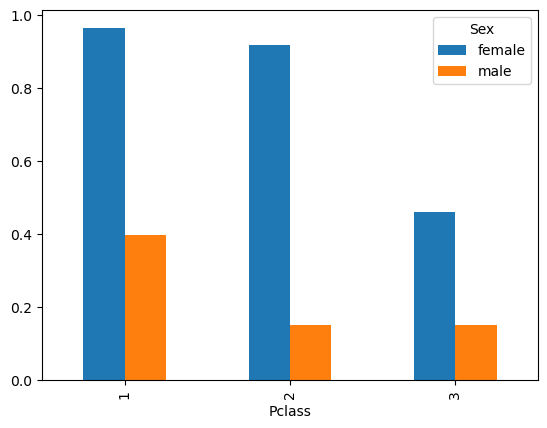

In [28]:
df_ex2.pivot_table('Survived', index='Pclass', columns='Sex', aggfunc='mean').plot(kind='bar')
plt.show()

## 05. seaborn으로 시각화 하기

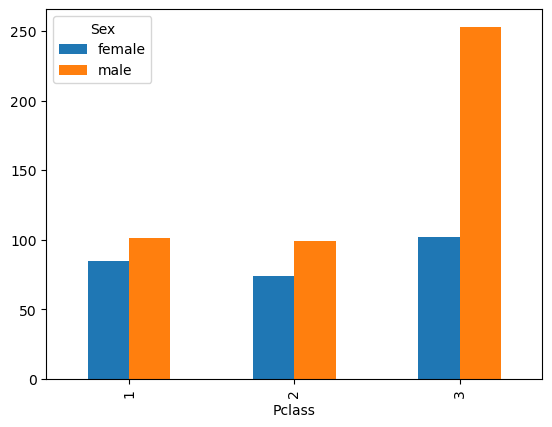

In [36]:
df_ex2.pivot_table('Survived', index='Pclass', columns='Sex', aggfunc='count').plot(kind='bar')
plt.show()

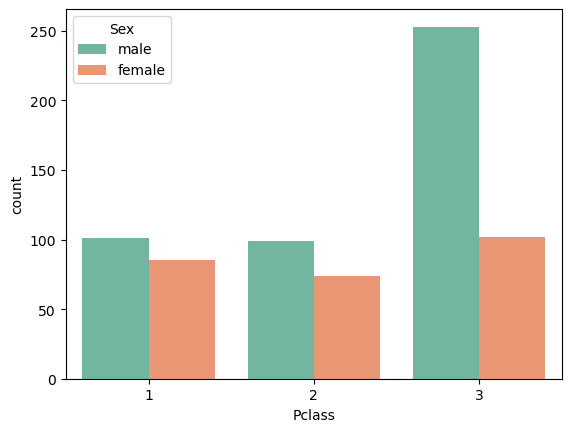

In [42]:
sns.countplot(df_ex2, x='Pclass', hue='Sex', palette='Set2')
plt.show()

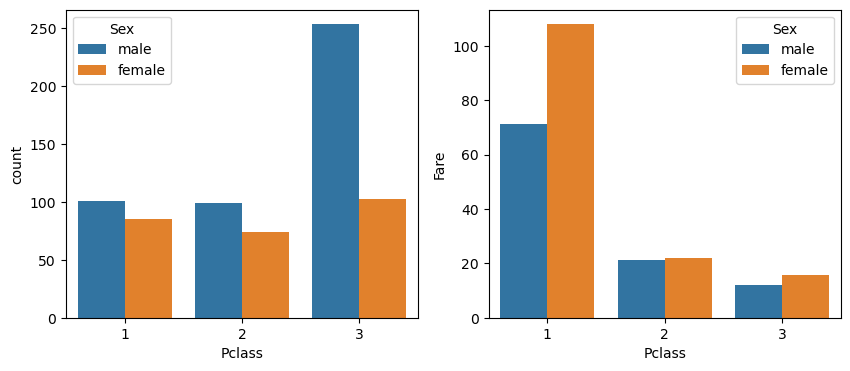

In [66]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(df_ex2, x='Pclass', hue='Sex')
plt.subplot(1,2,2)
sns.barplot(data=df_ex2, x='Pclass', y='Fare', errorbar=('ci', False), hue='Sex', estimator='mean')
plt.show()

## 06. 맞춤형 피벗테이블 만들기

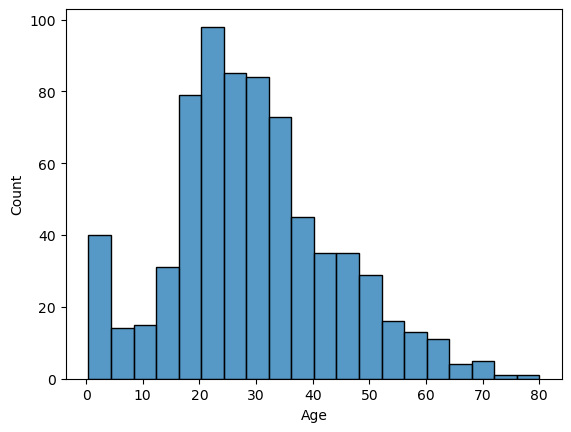

In [69]:
sns.histplot(df_ex2['Age'])
plt.show()

In [72]:
cond1 = df_ex2.Age <= 15
df_ex2.loc[cond1].pivot_table('Survived', index='Pclass')
df_ex2.loc[~cond1].pivot_table('Survived', index='Pclass')

,Survived
Pclass,
1,0.650000
2,0.415584
3,0.202020


In [74]:
df_ex3 = df_ex2.copy()
df_ex3['A or C'] = df_ex3['Age'].mask(cond1, 'child').mask(~cond1, 'adult')
df_ex3

,Survived,Pclass,Sex,Age,Fare,A or C
0,0,3,male,22.0,7.2500,adult
1,1,1,female,38.0,71.2833,adult
2,1,3,female,26.0,7.9250,adult
3,1,1,female,35.0,53.1000,adult
4,0,3,male,35.0,8.0500,adult
...,...,...,...,...,...,...
885,0,3,female,39.0,29.1250,adult
886,0,2,male,27.0,13.0000,adult
887,1,1,female,19.0,30.0000,adult
889,1,1,male,26.0,30.0000,adult


In [78]:
df_ex3.pivot_table('Survived', index='Pclass', columns='A or C')

A or C,adult,child
Pclass,,
1,0.650000,0.833333
2,0.415584,1.000000
3,0.202020,0.431034


## 07. seaborn 및 피벗테이블에 lambda함수 적용하기

In [80]:
df_ex1.pivot_table('Age', index='Pclass', columns='Sex', aggfunc=lambda x: df_ex1.loc[x.idxmax(), 'Name'])

Sex,female,male
Pclass,,
1,"Andrews, Miss. Kornelia Theodosia","Barkworth, Mr. Algernon Henry Wilson"
2,"Mack, Mrs. (Mary)","Mitchell, Mr. Henry Michael"
3,"Turkula, Mrs. (Hedwig)","Svensson, Mr. Johan"


In [88]:
cond1 = df_ex3['Age'] <= 15
df_ex3.loc[cond1].pivot_table('Age', index='Pclass', columns='Sex', aggfunc='count')

Sex,female,male
Pclass,,
1,3,3
2,10,9
3,30,28


In [92]:
df_ex3.pivot_table('Age', index='Pclass', columns='Sex', aggfunc=lambda x: (x<=15).sum())

Sex,female,male
Pclass,,
1,3,3
2,10,9
3,30,28


In [93]:
df_ex3.pivot_table('Age', index='Pclass', columns='Sex', aggfunc=lambda x: (x<=15).mean())

Sex,female,male
Pclass,,
1,0.035294,0.029703
2,0.135135,0.090909
3,0.294118,0.110672
